# Naive Bayes

## class_vis.py

In [8]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Z is the critical zone that will be painted in the plot
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    %matplotlib inline
    print(Z.shape)
    print(xx.shape)
    # Z is being reshaped to 2-D
    Z = Z.reshape(xx.shape)
    
    # Choose limits for the plot
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    
    # Definimos el color del fondo
    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")

### import base64
### import json
### import subprocess

### def output_image(name, format, bytes):
###    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
###    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
###    data = {}
###    data['name'] = name
###    data['format'] = format
###    data['bytes'] = base64.encodestring(bytes)
###    print(image_start+json.dumps(data)+image_end)

## prep_terrain_data.py

In [9]:
#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    ### Choose one seed so the random scenario its always the same random scenario
    random.seed(42)
    ### Use random.random() in order to generate 1000 (n_points) numbers between 0 and 1 ((features or input))
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    
    ### Create a len = 1000 vector that relates grade and bumpy ((labels or output))
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    
    ### Round some high values to 1 so all items are between 0 and 1
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    ### Create a variable with one measure of grade and one of bumpy
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]

    
    ### Create a mark at 75% of n_points in order to train the model with 75% of
    ### the dataset and test with the other 25%
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}
    
    
    return X_train, y_train, X_test, y_test



## ClassifyNB.py

In [10]:
def classify(features_train, labels_train):   
    ### import the sklearn module for GaussianNB
    from sklearn.naive_bayes import GaussianNB

    ### create classifier
    clf = GaussianNB()

    ### fit the classifier on the training features and labels
    clf.fit(features_train, labels_train)

    ### return the fit classifier
    return clf    


## studentMain.py

(10000,)
(100, 100)


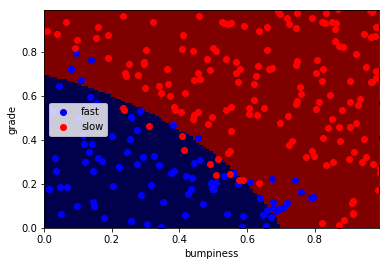

In [15]:
""" Complete the code in ClassifyNB.py with the sklearn
    Naive Bayes classifier to classify the terrain data.
    
    The objective of this exercise is to recreate the decision 
    boundary found in the lesson video, and make a plot that
    visually shows the decision boundary """

features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


# You will need to complete this function imported from the ClassifyNB script.
# Be sure to change to that code tab to complete this quiz.
clf = classify(features_train, labels_train)


### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
#output_image("test.png", "png", open("test.png", "rb").read())


## Naive-Bayes Accuracy

In [16]:
def NBAccuracy(features_train, labels_train, features_test, labels_test):
    """ compute the accuracy of your Naive Bayes classifier """
    ### import the sklearn module for GaussianNB
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score

    ### create classifier
    clf = GaussianNB()

    ### fit the classifier on the training features and labels
    clf.fit(features_train, labels_train)

    ### use the trained classifier to predict labels for the test features
    pred = clf.fit(features_test, labels_test)


    ### calculate and return the accuracy on the test data
    ### this is slightly different than the example, 
    ### where we just print the accuracy
    ### you might need to import an sklearn module
    
    ### use the trained classifier to predict labels for the test features
    
    # method 1: It calculates the accuracy w/o the need of running the prediction
    accuracy = clf.score(features_test, labels_test)
    
    # method 2
    # It returns a prediction of the labels corresponding to features_test
    pred = clf.predict(features_test)
    
    # It compares the above prediction with the labels_test vector
    accuracy = accuracy_score(pred, labels_test)
    
    return accuracy

accuracy = NBAccuracy(features_train, labels_train, features_test, labels_test)
print("Accuracy = " + str(accuracy))

Accuracy = 0.896


In [17]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

def submitAccuracy():
    accuracy = NBAccuracy(features_train, labels_train, features_test, labels_test)
    return accuracy

print(submitAccuracy())

0.896


## Author id

In [18]:
#!/usr/bin/python

print
print( "checking for nltk")
try:
    import nltk
except ImportError:
    print( "you should install nltk before continuing")

print( "checking for numpy")
try:
    import numpy
except ImportError:
    print( "you should install numpy before continuing")

print("checking for scipy")
try:
    import scipy
except:
    print( "you should install scipy before continuing")

print( "checking for sklearn")
try:
    import sklearn
except:
    print( "you should install sklearn before continuing")

print
print( "downloading the Enron dataset (this may take a while)")
print( "to check on progress, you can cd up one level, then execute <ls -lthr>")
print( "Enron dataset should be last item on the list, along with its current size")
print("download will complete at about 423 MB")
import urllib
url = "https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz"
urllib.request.urlopen(url, filename="../enron_mail_20150507.tar.gz") 
print("download complete!")


print
print( "unzipping Enron dataset (this may take a while)")
import tarfile
import os
os.chdir("..")
tfile = tarfile.open("enron_mail_20150507.tar.gz", "r:gz")
tfile.extractall(".")

print("you're ready to go!")


checking for nltk
checking for numpy
checking for scipy
checking for sklearn
downloading the Enron dataset (this may take a while)
to check on progress, you can cd up one level, then execute <ls -lthr>
Enron dataset should be last item on the list, along with its current size
download will complete at about 423 MB


TypeError: urlopen() got an unexpected keyword argument 'filename'

In [23]:
import pickle
import cPickle
import numpy

from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif



def preprocess(words_file = "C:\Users\Serg\Documents\Aprendiendo\Data Analysis\Module 6 - Machine Learning\ud120-projects-master\tools\word_data.pkl", authors_file="C:\Users\Serg\Documents\Aprendiendo\Data Analysis\Module 6 - Machine Learning\ud120-projects-master\tools\email_authors.pkl"):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features

        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions

        4 objects are returned:
            -- training/testing features
            -- training/testing labels

    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "r")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    words_file_handler = open(words_file, "r")
    word_data = cPickle.load(words_file_handler)
    words_file_handler.close()

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)



    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=10)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print( "no. of Chris training emails:", sum(labels_train))
    print( "no. of Sara training emails:", len(labels_train)-sum(labels_train))
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-23-15242fb2a7e7>, line 11)

In [7]:
#!/usr/bin/python

""" 
    This is the code to accompany the Lesson 1 (Naive Bayes) mini-project. 

    Use a Naive Bayes Classifier to identify emails by their authors
    
    authors and labels:
    Sara has label 0
    Chris has label 1
"""
    
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess


### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()




#########################################################
### your code goes here ###
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# the classifier
clf = GaussianNB()

# train
t0 = time()
clf.fit(features_train, labels_train)
print("\ntraining time:", round(time()-t0, 3), "s")

# predict
t0 = time()
pred = clf.predict(features_test)
print("predicting time:", round(time()-t0, 3), "s")

accuracy = accuracy_score(pred, labels_test)

print('\naccuracy = {0}'.format(accuracy))

#########################################################




ModuleNotFoundError: No module named 'email_preprocess'